In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
villagers = pd.read_csv('villagers.csv')

In [3]:
villagers.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE


# Tidying up the data


## Dropping columns we don't need

In [4]:
villagers.columns

Index(['Name', 'Species', 'Gender', 'Personality', 'Hobby', 'Birthday',
       'Catchphrase', 'Favorite Song', 'Style 1', 'Style 2', 'Color 1',
       'Color 2', 'Wallpaper', 'Flooring', 'Furniture List', 'Filename',
       'Unique Entry ID'],
      dtype='object')

In [5]:
villagers.drop(columns= ['Catchphrase', 'Style 1', 'Style 2', 'Color 1',
       'Color 2', 'Wallpaper', 'Flooring', 'Furniture List','Unique Entry ID'], inplace= True)

## Birthday to date

In [6]:
villagers['Birthday'] = pd.to_datetime(villagers['Birthday'], format = "%d-%b")
villagers['Birthday'] = villagers['Birthday'].apply(lambda dt: dt.replace(year = 2020))

## Gender to number

In [7]:
villagers["Gender"] = villagers["Gender"].replace(["Female", "Male"], [0, 1])

## Changing the Personality to vector values
As the total 8 personality types in the game for villagers are actually split into 4 for each gender, I've decided to refactor the female and male counterparts into the same value. I thought it made more sense to do it this way and "degender" the personality, as we already have a Gender value that we can apply to get the exact Personality.

I decided it'd be an interesting idea to arrange the personality types in a 'spiciness' scale, based on how often these villagers can say something "out of line". Therefore, we have the Normal and Lazy villagers as 'mild' with a value of 0 and Snooty and Cranky villagers with a 'very hot' rating of 3.


| Spiciness/ *Gender*	| Mild - 0 	| Medium - 1   	| Hot - 2    	| Very Hot - 3 	|
|----------------------	|----------	|--------------	|--------------	|--------------	|
| *Female* - 0        	| Normal   	| Peppy      	| Big Sister 	| Snooty       	|
| *Male* - 1          	| Lazy     	| Jock       	| Smug       	| Cranky       	|

In [8]:
villagers["Personality"] = villagers["Personality"].replace(["Normal", "Lazy"], 0)
villagers["Personality"] = villagers["Personality"].replace(["Peppy", "Jock"], 1)
villagers["Personality"] = villagers["Personality"].replace(["Big Sister", "Smug"], 2)
villagers["Personality"] = villagers["Personality"].replace(["Snooty", "Cranky"], 3)

In [9]:
villagers.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Favorite Song,Filename
0,Admiral,Bird,1,3,Nature,2020-01-27,Steep Hill,brd06
1,Agent S,Squirrel,0,1,Fitness,2020-07-02,Go K.K. Rider,squ05
2,Agnes,Pig,0,2,Play,2020-04-21,K.K. House,pig17
3,Al,Gorilla,1,0,Fitness,2020-10-18,Go K.K. Rider,gor08
4,Alfonso,Alligator,1,0,Play,2020-06-09,Forest Life,crd00


## Changing the Species to numerical values
By default in the games, the 'Cow' and 'Bull' Species are gender exclusive mutually. So the first thing we need to do before anything else is to unify these two into the same Species which I have decided to call 'Cattle'.

In [10]:
villagers["Species"] = villagers["Species"].replace(["Cow", "Bull"], "Cattle")

Once that's done, we need to have a look at how many species of villagers we have in the Animal Crossing universe.

In [11]:
species = sorted(villagers.Species.unique())
print(species)
len(species)

['Alligator', 'Anteater', 'Bear', 'Bird', 'Cat', 'Cattle', 'Chicken', 'Cub', 'Deer', 'Dog', 'Duck', 'Eagle', 'Elephant', 'Frog', 'Goat', 'Gorilla', 'Hamster', 'Hippo', 'Horse', 'Kangaroo', 'Koala', 'Lion', 'Monkey', 'Mouse', 'Octopus', 'Ostrich', 'Penguin', 'Pig', 'Rabbit', 'Rhino', 'Sheep', 'Squirrel', 'Tiger', 'Wolf']


34

It turns that based on our data, that's a total of 34!
Now in order to replace the species with numerical values we just have to create a dictionary with the species as the key and assign a numerical value to each.

In [12]:
species_dict = dict(zip(species, range(len(species))))
print(species_dict)

{'Alligator': 0, 'Anteater': 1, 'Bear': 2, 'Bird': 3, 'Cat': 4, 'Cattle': 5, 'Chicken': 6, 'Cub': 7, 'Deer': 8, 'Dog': 9, 'Duck': 10, 'Eagle': 11, 'Elephant': 12, 'Frog': 13, 'Goat': 14, 'Gorilla': 15, 'Hamster': 16, 'Hippo': 17, 'Horse': 18, 'Kangaroo': 19, 'Koala': 20, 'Lion': 21, 'Monkey': 22, 'Mouse': 23, 'Octopus': 24, 'Ostrich': 25, 'Penguin': 26, 'Pig': 27, 'Rabbit': 28, 'Rhino': 29, 'Sheep': 30, 'Squirrel': 31, 'Tiger': 32, 'Wolf': 33}


However, after I thought this through I realised this made no sense. If I was ranking the Personality on a 'spiciness' scale, why was I just assigning values to the Species arbitrarily (alphabetically)?

I thought it'd make sense if we organised them in a 'phylogenetic tree' kind of way, similar to how New Horizons shows the different villager species in the last room at the Fossil area in the museum. I did a bit of searching online and found this wonderful [Animal Crossing Cladogram] (https://www.reddit.com/r/AnimalCrossing/comments/ffwkvb/i_made_a_cladogram_for_all_the_species_of_the/) by [SaxoLaxo](https://www.reddit.com/user/SaxoLaxo/) on Reddit. 



![cladogram](img/Cladogram.jpg)


However, for the sake of brevity I'll be simplifying this classification a little bit:

- We'll be using the in-game Species, instead of its irl ones: Queenie (emu), Flora (flamingo), Cranston (crane) and Julia (peacock) will stay as 'Ostrich'.


| Queenie                   	| Flora                   	| Cranston                   	| Julia                   	|
|:---------------------------:	|:------------------------: |:---------------------------:  |:------------------------:	|
| ![Queenie](img/ost00.png) 	| ![Flora](img/ost09.png) 	| ![Cranston](img/ost06.png) 	| ![Julia](img/ost05.png) 	|
| *An Ostrich*                       	| *Another Ostrich*               	| *Yet another Ostrich*                      	| *And another one*                	|


- Distance between species has been simplified: If going down a branch there's no species in the left sub-branch, the current sub-brach will be ignored and not accounted for.





In [13]:
species_dict.update({'Octopus': 0, 'Frog': 1, 'Alligator': 2, 'Ostrich': 3, 'Chicken': 4, 'Duck': 5, 'Penguin': 6, 'Eagle': 7, 'Bird': 8, 'Kangaroo': 9, 'Koala': 10, 'Anteater': 11, 'Elephant': 12, 'Gorilla': 13, 'Monkey': 14, 'Rabbit': 15, 'Squirrel': 16, 'Mouse': 17, 'Hamster': 18, 'Pig': 19, 'Hippo': 20, 'Deer': 21, 'Cattle': 22, 'Goat': 23, 'Sheep': 24, 'Horse': 25, 'Rhino': 26, 'Tiger': 27, 'Lion': 28, 'Cat': 29, 'Dog': 30, 'Wolf': 31, 'Cub': 32, 'Bear': 33 })

However, I came to the conclusion that this solution wasn't any good either. While it made more sense than having them alphabetically, it was still quite arbitraty to have the jump

In [14]:
spatial_species = {'Octopus': {"x": 3, "z": 3, "y": 0}, 'Frog': {"x": 0, "z": 2, "y": 2}, 'Alligator': {"x": -1, "z": 1, "y": 3}, 'Ostrich': {"x": -2, "z": 0, "y": 5}, 'Chicken': {"x": -2, "z": -1, "y": 6}, 'Duck': {"x": -1, "z": 1, "y": 6}, 'Kangaroo': {"x": -4, "z": 5, "y": 6}, 'Koala': {"x": -5, "z": 4, "y": 6}, 'Anteater': {"x": -4, "z": 3, "y": 6}, 'Elephant': {"x": -2, "z": 4, "y": 6}, 'Penguin': {"x": 1, "z": 1, "y": 7}, 'Eagle': {"x": 2, "z": 1, "y": 7}, 'Bird': {"x": 0, "z": -2, "y": 7},  'Gorilla': {"x": -2, "z": 4, "y": 7}, 'Monkey': {"x": -3, "z": 3, "y": 7}, 'Rabbit': {"x": -4, "z": 5, "y": 7}, 'Squirrel': {"x": -5, "z": 4, "y": 7}, 'Mouse': {"x": -5, "z": 5, "y": 7}, 'Hippo': {"x": 0, "z": 3, "y": 8}, 'Deer': {"x": -2, "z": 0, "y": 8}, 'Rhino': {"x": -2, "z": 3, "y": 8}, 'Tiger': {"x": -5, "z": 3, "y": 8}, 'Lion': {"x": -5, "z": 2, "y": 8}, 'Bear': {"x": -5, "z": -1, "y": 8}, 'Wolf': {"x": -5, "z": -5, "y": 8}, 'Cattle': {"x": -3, "z": 0, "y": 9}, 'Goat': {"x": -3, "z": 1, "y": 9}, 'Sheep': {"x": -2, "z": 1, "y": 9}, 'Horse': {"x": -2, "z": -2, "y": 9}, 'Cat': {"x": -5, "z": 2, "y": 9}, 'Hamster': {"x": -5, "z": 5, "y": 9}, 'Pig': {"x": -1, "z": 2, "y": 9}, 'Dog': {"x": -5, "z": -5, "y": 9}, 'Cub': {"x": -5, "z": -1, "y": 9}}

In [15]:
species_array_dict = {}
for species, location in spatial_species.items():
    new_values = np.array(list(location.values()))
    species_array_dict.update({species: new_values})
print(species_array_dict)
print(type(species_array_dict))
print(type(new_values))

{'Octopus': array([3, 3, 0]), 'Frog': array([0, 2, 2]), 'Alligator': array([-1,  1,  3]), 'Ostrich': array([-2,  0,  5]), 'Chicken': array([-2, -1,  6]), 'Duck': array([-1,  1,  6]), 'Kangaroo': array([-4,  5,  6]), 'Koala': array([-5,  4,  6]), 'Anteater': array([-4,  3,  6]), 'Elephant': array([-2,  4,  6]), 'Penguin': array([1, 1, 7]), 'Eagle': array([2, 1, 7]), 'Bird': array([ 0, -2,  7]), 'Gorilla': array([-2,  4,  7]), 'Monkey': array([-3,  3,  7]), 'Rabbit': array([-4,  5,  7]), 'Squirrel': array([-5,  4,  7]), 'Mouse': array([-5,  5,  7]), 'Hippo': array([0, 3, 8]), 'Deer': array([-2,  0,  8]), 'Rhino': array([-2,  3,  8]), 'Tiger': array([-5,  3,  8]), 'Lion': array([-5,  2,  8]), 'Bear': array([-5, -1,  8]), 'Wolf': array([-5, -5,  8]), 'Cattle': array([-3,  0,  9]), 'Goat': array([-3,  1,  9]), 'Sheep': array([-2,  1,  9]), 'Horse': array([-2, -2,  9]), 'Cat': array([-5,  2,  9]), 'Hamster': array([-5,  5,  9]), 'Pig': array([-1,  2,  9]), 'Dog': array([-5, -5,  9]), 'Cub': 

In [16]:
# As a series
species_xzy_series = pd.Series(species_array_dict)
print(species_xzy_series)

Octopus        [3, 3, 0]
Frog           [0, 2, 2]
Alligator     [-1, 1, 3]
Ostrich       [-2, 0, 5]
Chicken      [-2, -1, 6]
Duck          [-1, 1, 6]
Kangaroo      [-4, 5, 6]
Koala         [-5, 4, 6]
Anteater      [-4, 3, 6]
Elephant      [-2, 4, 6]
Penguin        [1, 1, 7]
Eagle          [2, 1, 7]
Bird          [0, -2, 7]
Gorilla       [-2, 4, 7]
Monkey        [-3, 3, 7]
Rabbit        [-4, 5, 7]
Squirrel      [-5, 4, 7]
Mouse         [-5, 5, 7]
Hippo          [0, 3, 8]
Deer          [-2, 0, 8]
Rhino         [-2, 3, 8]
Tiger         [-5, 3, 8]
Lion          [-5, 2, 8]
Bear         [-5, -1, 8]
Wolf         [-5, -5, 8]
Cattle        [-3, 0, 9]
Goat          [-3, 1, 9]
Sheep         [-2, 1, 9]
Horse        [-2, -2, 9]
Cat           [-5, 2, 9]
Hamster       [-5, 5, 9]
Pig           [-1, 2, 9]
Dog          [-5, -5, 9]
Cub          [-5, -1, 9]
dtype: object


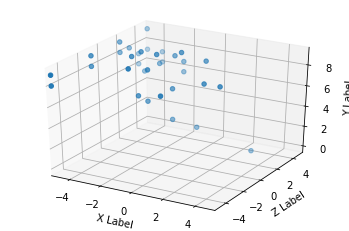

In [17]:
data = species_xzy_series.values
xs, zs, ys = zip(*data)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xs, zs, ys)

ax.set_xlabel('X Label')
ax.set_ylabel('Z Label')
ax.set_zlabel('Y Label')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.show()

In [18]:
species_XZY_df = pd.DataFrame({"Species": species_xzy_series.index, "SpeciesXZY": species_xzy_series.values})

In [19]:
villagers = pd.DataFrame.merge(villagers, species_XZY_df, how = "left", left_on = ["Species"], right_on = ["Species"])

In [20]:
species_df_icons = pd.DataFrame({"Species": villagers.Species, "Icon_Path": villagers.Filename.str.slice(0,3)})
species_df_icons

,Species,Icon_Path
0,Bird,brd
1,Squirrel,squ
2,Pig,pig
3,Gorilla,gor
4,Alligator,crd
...,...,...
386,Horse,hrs
387,Wolf,wol
388,Koala,kal
389,Deer,der


In [21]:
species_df_icons["Icon_Path"].replace("bul", "cow", inplace = True)
path_list = "img/" + species_df_icons["Icon_Path"].unique() + "_icon.png"
print(path_list)
species_list = species_df_icons["Species"].unique()
print(species_list)
path_df = pd.DataFrame({"Species": species_list, "Path": path_list})
path_df.head()

['img/brd_icon.png' 'img/squ_icon.png' 'img/pig_icon.png'
 'img/gor_icon.png' 'img/crd_icon.png' 'img/kal_icon.png'
 'img/pbr_icon.png' 'img/ant_icon.png' 'img/cow_icon.png'
 'img/mus_icon.png' 'img/cat_icon.png' 'img/hrs_icon.png'
 'img/ham_icon.png' 'img/kgr_icon.png' 'img/wol_icon.png'
 'img/pgn_icon.png' 'img/chn_icon.png' 'img/elp_icon.png'
 'img/shp_icon.png' 'img/der_icon.png' 'img/tig_icon.png'
 'img/cbr_icon.png' 'img/dog_icon.png' 'img/bea_icon.png'
 'img/hip_icon.png' 'img/duk_icon.png' 'img/goa_icon.png'
 'img/ost_icon.png' 'img/rbt_icon.png' 'img/lon_icon.png'
 'img/flg_icon.png' 'img/mnk_icon.png' 'img/rhn_icon.png'
 'img/ocp_icon.png']
['Bird' 'Squirrel' 'Pig' 'Gorilla' 'Alligator' 'Koala' 'Eagle' 'Anteater'
 'Cattle' 'Mouse' 'Cat' 'Horse' 'Hamster' 'Kangaroo' 'Wolf' 'Penguin'
 'Chicken' 'Elephant' 'Sheep' 'Deer' 'Tiger' 'Cub' 'Dog' 'Bear' 'Hippo'
 'Duck' 'Goat' 'Ostrich' 'Rabbit' 'Lion' 'Frog' 'Monkey' 'Rhino' 'Octopus']


,Species,Path
0,Bird,img/brd_icon.png
1,Squirrel,img/squ_icon.png
2,Pig,img/pig_icon.png
3,Gorilla,img/gor_icon.png
4,Alligator,img/crd_icon.png


In [22]:
species_XZY_df  = pd.DataFrame.merge(species_XZY_df, path_df, how = "left", left_on = ["Species"], right_on = ["Species"])
species_XZY_df.head()

,Species,SpeciesXZY,Path
0,Octopus,"[3, 3, 0]",img/ocp_icon.png
1,Frog,"[0, 2, 2]",img/flg_icon.png
2,Alligator,"[-1, 1, 3]",img/crd_icon.png
3,Ostrich,"[-2, 0, 5]",img/ost_icon.png
4,Chicken,"[-2, -1, 6]",img/chn_icon.png


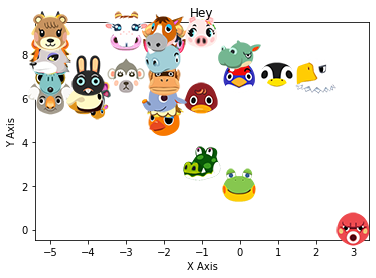

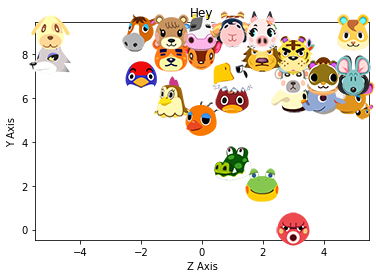

In [23]:
def getImage(path):
    return OffsetImage(plt.imread(path))

paths = species_XZY_df["Path"]

x, z, y = zip(*species_XZY_df["SpeciesXZY"])

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.title('Hey')
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)
plt.show()

fig, ax = plt.subplots()
ax.scatter(z, y)
plt.title('Hey')
plt.xlabel("Z Axis")
plt.ylabel("Y Axis")

for z0, y0, path in zip(z, y, paths):
    ab = AnnotationBbox(getImage(path), (z0, y0), frameon=False)
    ax.add_artist(ab)
plt.show()

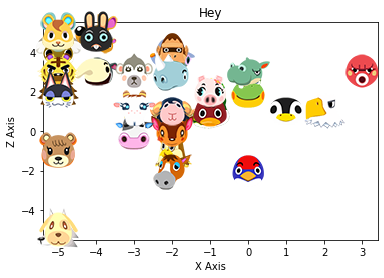

In [24]:
paths = species_XZY_df["Path"]

x, z, y = zip(*species_XZY_df["SpeciesXZY"])

fig, ax = plt.subplots()
ax.scatter(x, z)
plt.title('Hey')
plt.xlabel("X Axis")
plt.ylabel("Z Axis")

for x0, z0, path in zip(x, z, paths):
    ab = AnnotationBbox(getImage(path), (x0, z0), frameon=False)
    ax.add_artist(ab)
plt.show()

In [25]:
species_XZY_df["X"], species_XZY_df["Z"], species_XZY_df["Y"] = zip(*species_XZY_df["SpeciesXZY"])
species_XZY_df.head()

,Species,SpeciesXZY,Path,X,Z,Y
0,Octopus,"[3, 3, 0]",img/ocp_icon.png,3,3,0
1,Frog,"[0, 2, 2]",img/flg_icon.png,0,2,2
2,Alligator,"[-1, 1, 3]",img/crd_icon.png,-1,1,3
3,Ostrich,"[-2, 0, 5]",img/ost_icon.png,-2,0,5
4,Chicken,"[-2, -1, 6]",img/chn_icon.png,-2,-1,6


In [26]:
def scatter_plot(species_frame):
    paths = species_frame["Path"]

    x, z, y = zip(*species_frame["SpeciesXZY"])

    fig, ax = plt.subplots()
    ax.scatter(x, z)
    plt.title(f"Y = {level}")
    plt.xlabel("X Axis")
    plt.ylabel("Z Axis")
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

    for x0, z0, path in zip(x, z, paths):
        ab = AnnotationBbox(getImage(path), (x0, z0), frameon=False)
        ax.add_artist(ab)
    plt.show()

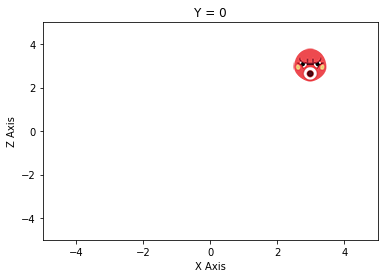

   Species SpeciesXZY              Path  X  Z  Y
0  Octopus  [3, 3, 0]  img/ocp_icon.png  3  3  0


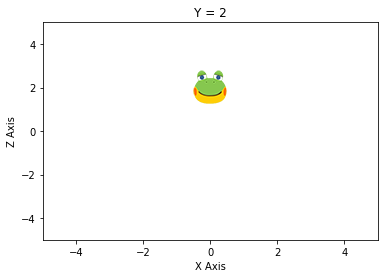

  Species SpeciesXZY              Path  X  Z  Y
1    Frog  [0, 2, 2]  img/flg_icon.png  0  2  2


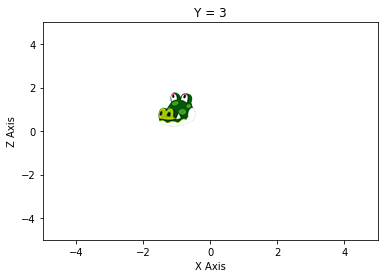

     Species  SpeciesXZY              Path  X  Z  Y
2  Alligator  [-1, 1, 3]  img/crd_icon.png -1  1  3


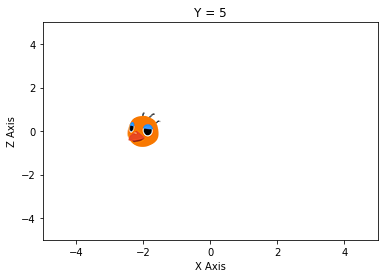

   Species  SpeciesXZY              Path  X  Z  Y
3  Ostrich  [-2, 0, 5]  img/ost_icon.png -2  0  5


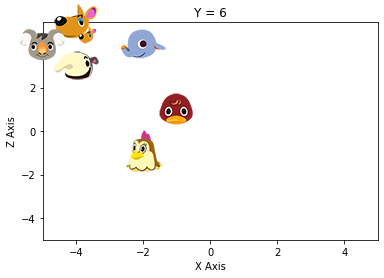

    Species   SpeciesXZY              Path  X  Z  Y
4   Chicken  [-2, -1, 6]  img/chn_icon.png -2 -1  6
5      Duck   [-1, 1, 6]  img/duk_icon.png -1  1  6
6  Kangaroo   [-4, 5, 6]  img/kgr_icon.png -4  5  6
7     Koala   [-5, 4, 6]  img/kal_icon.png -5  4  6
8  Anteater   [-4, 3, 6]  img/ant_icon.png -4  3  6
9  Elephant   [-2, 4, 6]  img/elp_icon.png -2  4  6


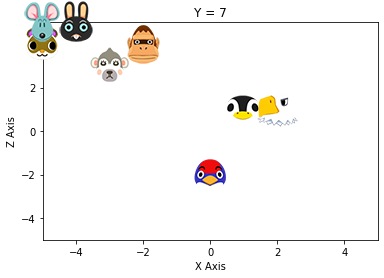

     Species  SpeciesXZY              Path  X  Z  Y
10   Penguin   [1, 1, 7]  img/pgn_icon.png  1  1  7
11     Eagle   [2, 1, 7]  img/pbr_icon.png  2  1  7
12      Bird  [0, -2, 7]  img/brd_icon.png  0 -2  7
13   Gorilla  [-2, 4, 7]  img/gor_icon.png -2  4  7
14    Monkey  [-3, 3, 7]  img/mnk_icon.png -3  3  7
15    Rabbit  [-4, 5, 7]  img/rbt_icon.png -4  5  7
16  Squirrel  [-5, 4, 7]  img/squ_icon.png -5  4  7
17     Mouse  [-5, 5, 7]  img/mus_icon.png -5  5  7


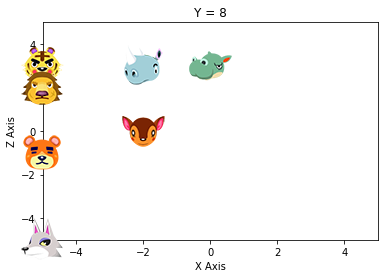

   Species   SpeciesXZY              Path  X  Z  Y
18   Hippo    [0, 3, 8]  img/hip_icon.png  0  3  8
19    Deer   [-2, 0, 8]  img/der_icon.png -2  0  8
20   Rhino   [-2, 3, 8]  img/rhn_icon.png -2  3  8
21   Tiger   [-5, 3, 8]  img/tig_icon.png -5  3  8
22    Lion   [-5, 2, 8]  img/lon_icon.png -5  2  8
23    Bear  [-5, -1, 8]  img/bea_icon.png -5 -1  8
24    Wolf  [-5, -5, 8]  img/wol_icon.png -5 -5  8


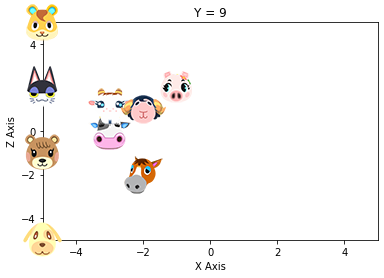

    Species   SpeciesXZY              Path  X  Z  Y
25   Cattle   [-3, 0, 9]  img/cow_icon.png -3  0  9
26     Goat   [-3, 1, 9]  img/goa_icon.png -3  1  9
27    Sheep   [-2, 1, 9]  img/shp_icon.png -2  1  9
28    Horse  [-2, -2, 9]  img/hrs_icon.png -2 -2  9
29      Cat   [-5, 2, 9]  img/cat_icon.png -5  2  9
30  Hamster   [-5, 5, 9]  img/ham_icon.png -5  5  9
31      Pig   [-1, 2, 9]  img/pig_icon.png -1  2  9
32      Dog  [-5, -5, 9]  img/dog_icon.png -5 -5  9
33      Cub  [-5, -1, 9]  img/cbr_icon.png -5 -1  9


In [38]:
for level in range(0,10):
    if not species_XZY_df[species_XZY_df.Y == level].empty:
        scatter_plot(species_XZY_df[species_XZY_df.Y == level])
        print(species_XZY_df[species_XZY_df.Y == level])

In [35]:
species_XZY_df[species_XZY_df.Y == 1].empty

True

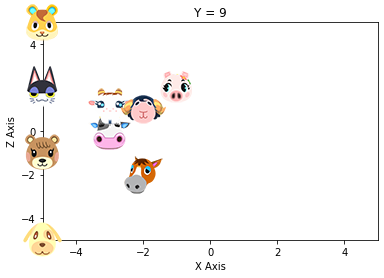

,Species,SpeciesXZY,Path,X,Z,Y
25,Cattle,"[-3, 0, 9]",img/cow_icon.png,-3,0,9
26,Goat,"[-3, 1, 9]",img/goa_icon.png,-3,1,9
27,Sheep,"[-2, 1, 9]",img/shp_icon.png,-2,1,9
28,Horse,"[-2, -2, 9]",img/hrs_icon.png,-2,-2,9
29,Cat,"[-5, 2, 9]",img/cat_icon.png,-5,2,9
30,Hamster,"[-5, 5, 9]",img/ham_icon.png,-5,5,9
31,Pig,"[-1, 2, 9]",img/pig_icon.png,-1,2,9
32,Dog,"[-5, -5, 9]",img/dog_icon.png,-5,-5,9
33,Cub,"[-5, -1, 9]",img/cbr_icon.png,-5,-1,9


In [29]:
scatter_plot(species_XZY_df[species_XZY_df.Y == 9])
species_XZY_df[species_XZY_df.Y == 9]

In [30]:
villagers[villagers.Species == "Cat"].sort_values(by="Filename")

,Name,Species,Gender,Personality,Hobby,Birthday,Favorite Song,Filename,SpeciesXZY
47,Bob,Cat,1,0,Play,2020-01-01,Neapolitan,cat00,"[-5, 2, 9]"
238,Mitzi,Cat,0,0,Education,2020-09-25,K.K. Love Song,cat01,"[-5, 2, 9]"
317,Rosie,Cat,0,1,Music,2020-02-27,Bubblegum K.K.,cat02,"[-5, 2, 9]"
257,Olivia,Cat,0,3,Music,2020-02-03,K.K. Sonata,cat03,"[-5, 2, 9]"
198,Kiki,Cat,0,0,Education,2020-10-08,Only Me,cat04,"[-5, 2, 9]"
355,Tangy,Cat,0,1,Music,2020-06-17,I Love You,cat05,"[-5, 2, 9]"
292,Punchy,Cat,1,0,Play,2020-04-11,Forest Life,cat06,"[-5, 2, 9]"
293,Purrl,Cat,0,3,Fashion,2020-05-29,K.K. Chorale,cat07,"[-5, 2, 9]"
239,Moe,Cat,1,0,Play,2020-01-12,Two Days Ago,cat08,"[-5, 2, 9]"
190,Kabuki,Cat,1,3,Music,2020-11-29,K.K. Jongara,cat09,"[-5, 2, 9]"


In [31]:
hobbies = sorted(villagers.Hobby.unique())
print(hobbies)

['Education', 'Fashion', 'Fitness', 'Music', 'Nature', 'Play']
